# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Objective: To build a model to predict the number of wins(W)

In [108]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import pingouin as pg
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import scikitplot as skplt


import pickle
import joblib


# Loading the dataset:

In [109]:
df=pd.read_csv('baseball.csv')
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [110]:
#checking the dimension of the dataset
df.shape

(30, 17)

Remarks: The dataset consists of 30 rows and 17 columns.

# Data Exploration/Analysis

In [111]:
#checking the column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [112]:
#renaming the columns in order to have a better understanding during EDA
df.rename({'R':'runs','AB':'at_bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walk','SO':'strikeout',
             'SB':'stolen_base','RA':'runs_allowed','ER':'earned_runs','ERA':'earned_run_avg','CG':'Complete Games','SHO':'shutouts','SV':'saves',
             'E':'error','W':'No_of_predicted_wins'},axis=1,inplace=True)

In [113]:
#checking the first five entries of the dataset
df.head().style.background_gradient(cmap='plasma')

In [114]:
#checking the last five entries of the dataset
df.tail().style.background_gradient(cmap='plasma')

In [115]:
#checking the datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No_of_predicted_wins  30 non-null     int64  
 1   runs                  30 non-null     int64  
 2   at_bats               30 non-null     int64  
 3   Hits                  30 non-null     int64  
 4   Doubles               30 non-null     int64  
 5   Triples               30 non-null     int64  
 6   Homeruns              30 non-null     int64  
 7   Walk                  30 non-null     int64  
 8   strikeout             30 non-null     int64  
 9   stolen_base           30 non-null     int64  
 10  runs_allowed          30 non-null     int64  
 11  earned_runs           30 non-null     int64  
 12  earned_run_avg        30 non-null     float64
 13  Complete Games        30 non-null     int64  
 14  shutouts              30 non-null     int64  
 15  saves                 30 

Remarks: All the columns are int datatype except for one column which is float datatype.

In [116]:
#checking for any null or missing value
df.isnull().sum()

No_of_predicted_wins    0
runs                    0
at_bats                 0
Hits                    0
Doubles                 0
Triples                 0
Homeruns                0
Walk                    0
strikeout               0
stolen_base             0
runs_allowed            0
earned_runs             0
earned_run_avg          0
Complete Games          0
shutouts                0
saves                   0
error                   0
dtype: int64

Remarks: It shows that there is no missing values in our dataset.

In [117]:
#checking unique values present in the columns
df.nunique()

No_of_predicted_wins    24
runs                    28
at_bats                 29
Hits                    29
Doubles                 22
Triples                 23
Homeruns                27
Walk                    29
strikeout               29
stolen_base             27
runs_allowed            30
earned_runs             30
earned_run_avg          30
Complete Games           9
shutouts                12
saves                   20
error                   21
dtype: int64

Remarks: Looking at all the unique values present in each of the columns in our dataset, we see that there are no categorical data present since even the unique numbers are large in number and cannot be segregated or combined..

# Statistical Analysis

In [118]:
df.describe().T.style.background_gradient(cmap='flag')

Observations:

count for all the columns are same, so, no data is missing.

# Exploratory Data Analysis (EDA)

# Univariate Analysis:

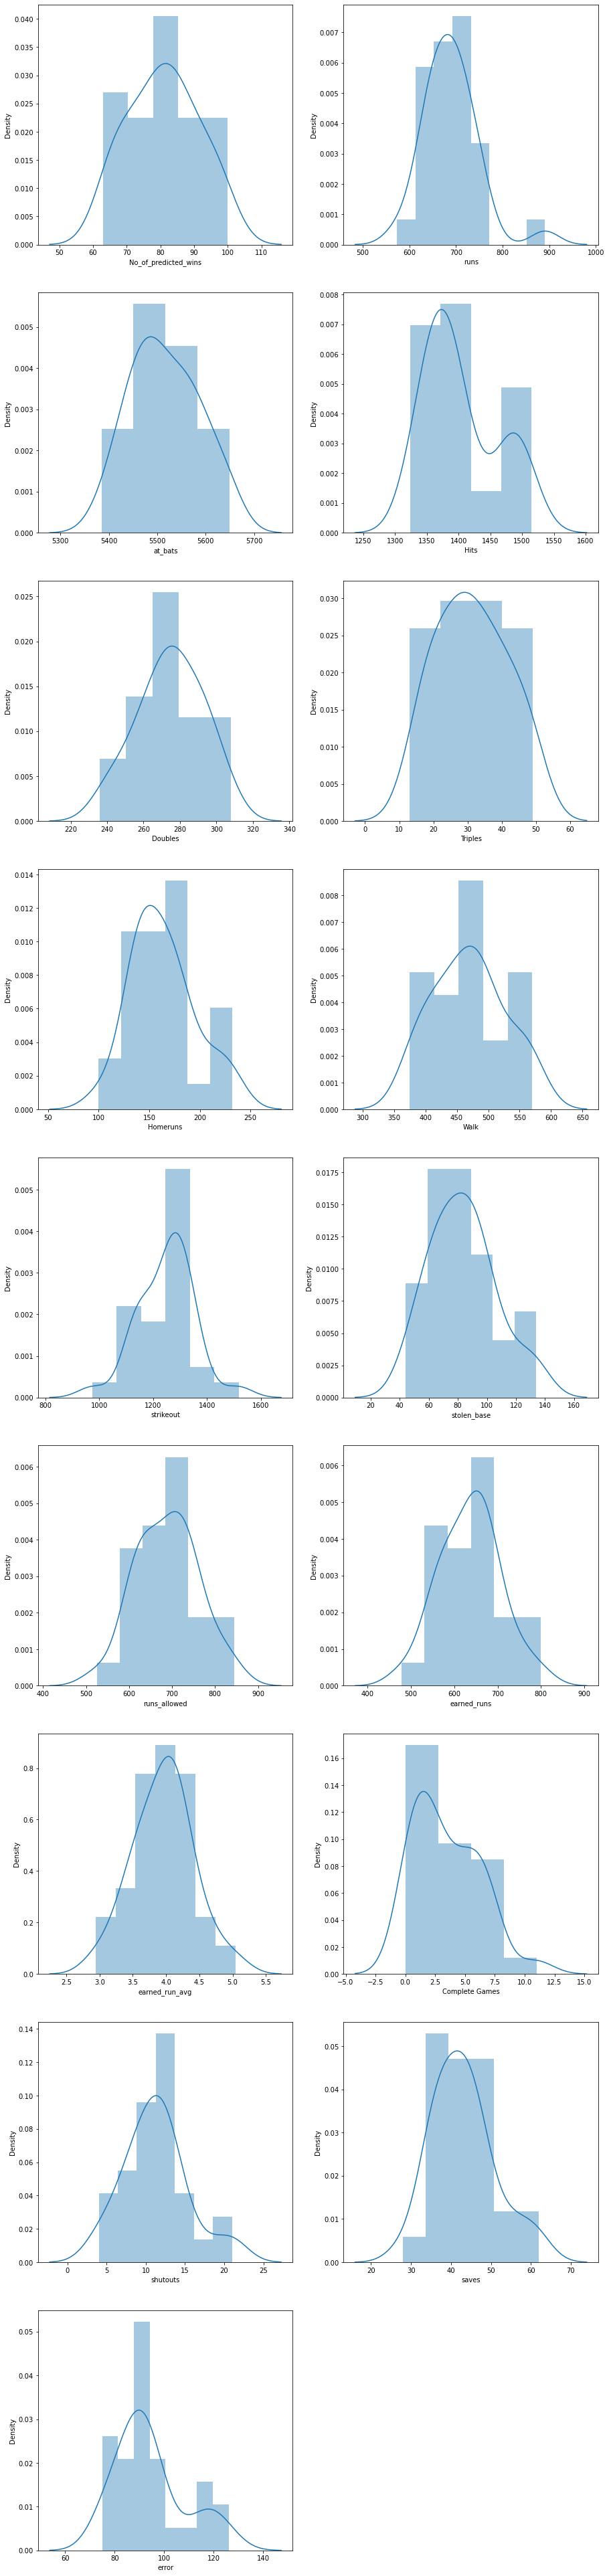

In [119]:
#checking distribution plot for all the columns
plt.figure(figsize=(15,70))
for i in enumerate(df):
  plt.subplot(9,2,i[0]+1)
  sns.distplot(df[i[1]])

Observation:
The above distribution plots shows that not a single column in our dataset is normally distributed.

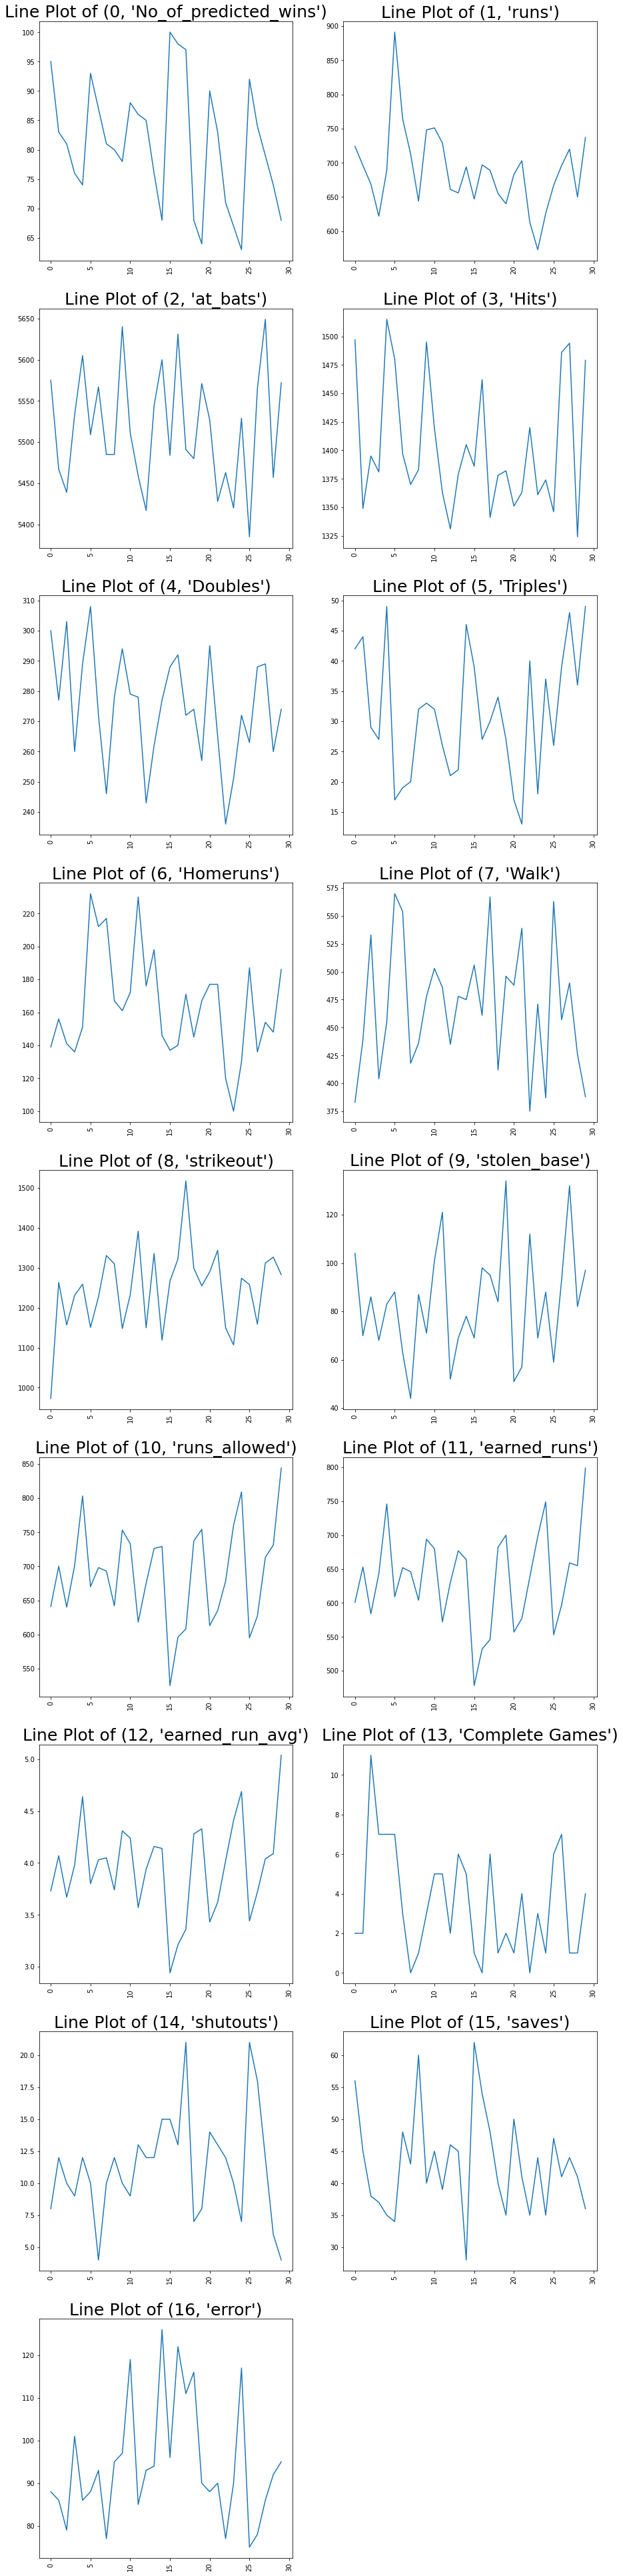

In [120]:
#checking lineplot for all the columns
col=['No_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error']


plt.figure(figsize=(15,70))
for i in enumerate(df):
  plt.subplot(9,2,i[0]+1)
  plt.plot(df[i[1]])
  plt.xticks(rotation=90)
  plt.title(f"Line Plot of {i}",fontsize=25)

Observation:
From the lineplots plotted above, we can see that runs_allowed, earned_run_avg, and earned_runs are the only columns that are stationary while the rest columns are not stationary.

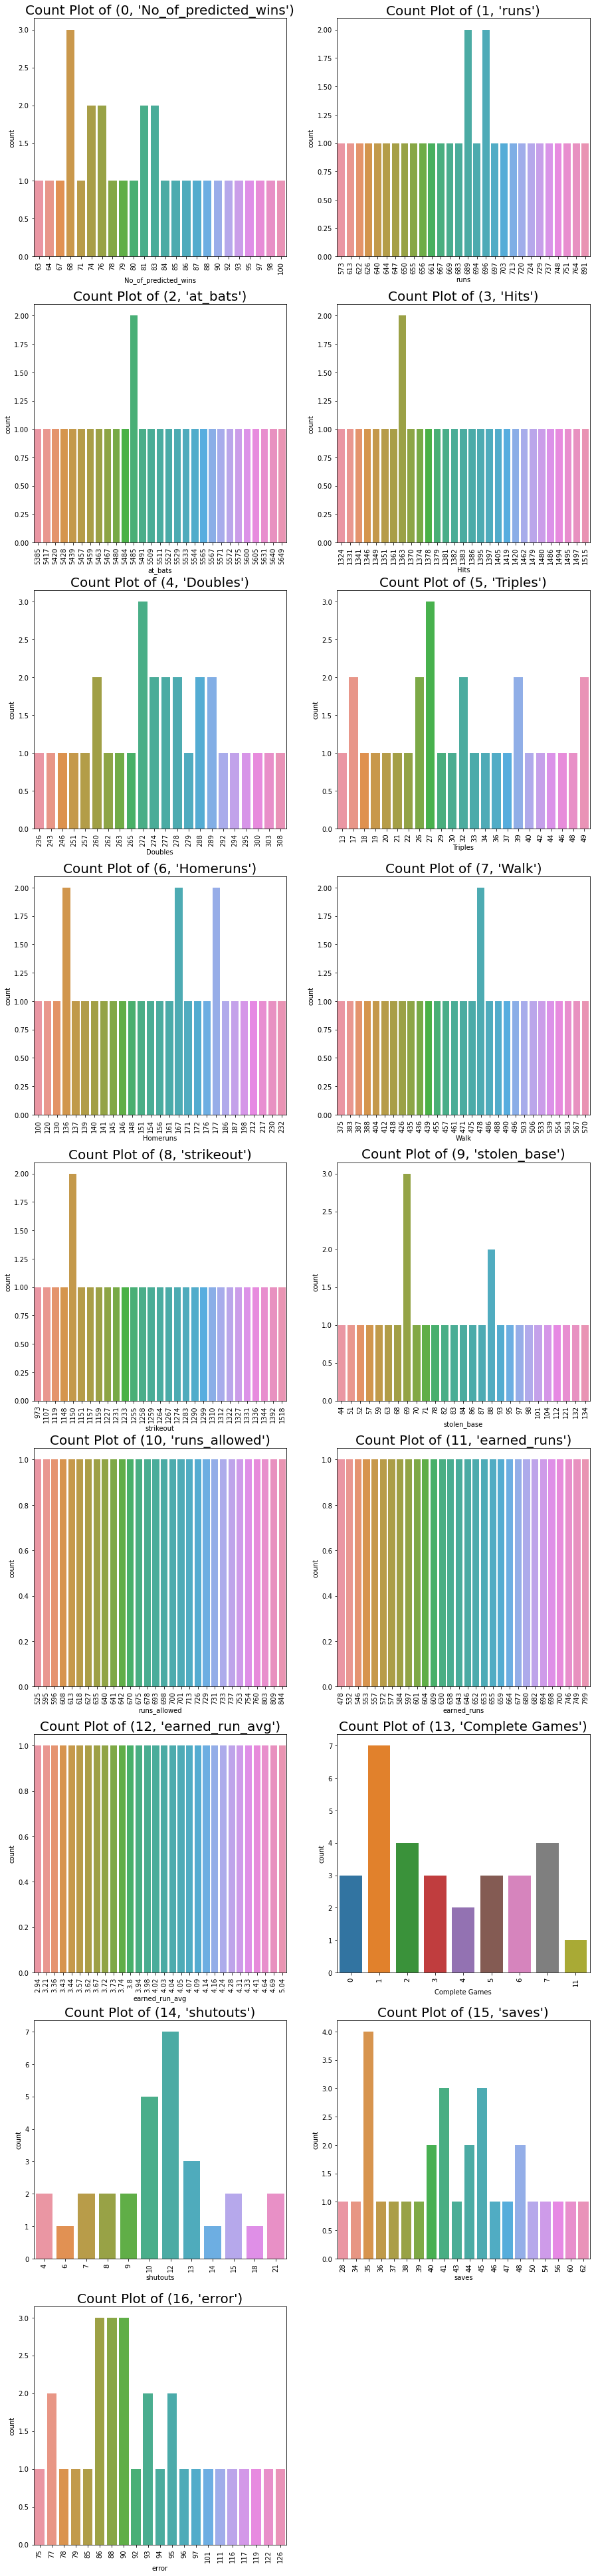

In [121]:
#checking the count plot for all the columns
plt.figure(figsize=(15,70))
for i in enumerate(df):
  plt.subplot(9,2,i[0]+1)
  sns.countplot(df[i[1]])
  plt.xticks(rotation=90)
  plt.title(f"Count Plot of {i}",fontsize=20)

Observations:

    From error column, we can see that the highest count for error is 3 while rest of them have a count of 1.

    From saves column, we can see that the highest count for saves is 4.

    From shutouts, we can say that 12 has the highest count which is 7, folowed by 10 having count 5 and 13 having count 3.

    From complete games column, we can say that 1,2,7 have the high count which is 7,4,4 and rest of them have same count of 3 while 11 has the least count of completion of match.

    From all the remaining columns, we see that they have equal count, still we can see they includes outliers.

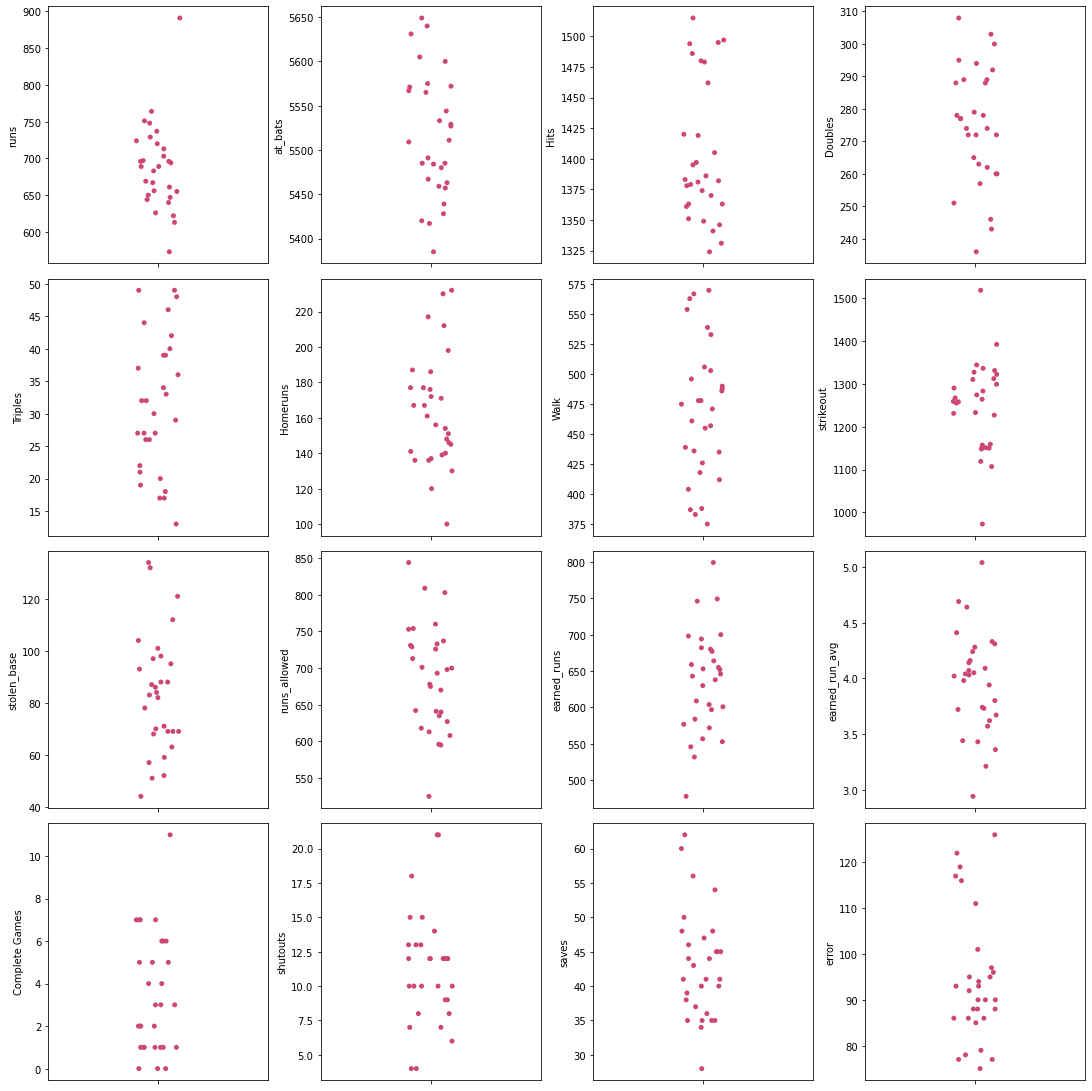

In [122]:
#checking the stripplot for all the feature columns
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("No_of_predicted_wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Remarks: The above strip plot shows the data point distribution across the dataset and it's range details. We can also see that columns like runs_allowed, StrikeOut, Complete Games with single data points far away from the general accumulation indicating towards the presence of ouliers.


# Bivariate Analysis:

In [123]:
col=['runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shutouts', 'saves',
       'error']

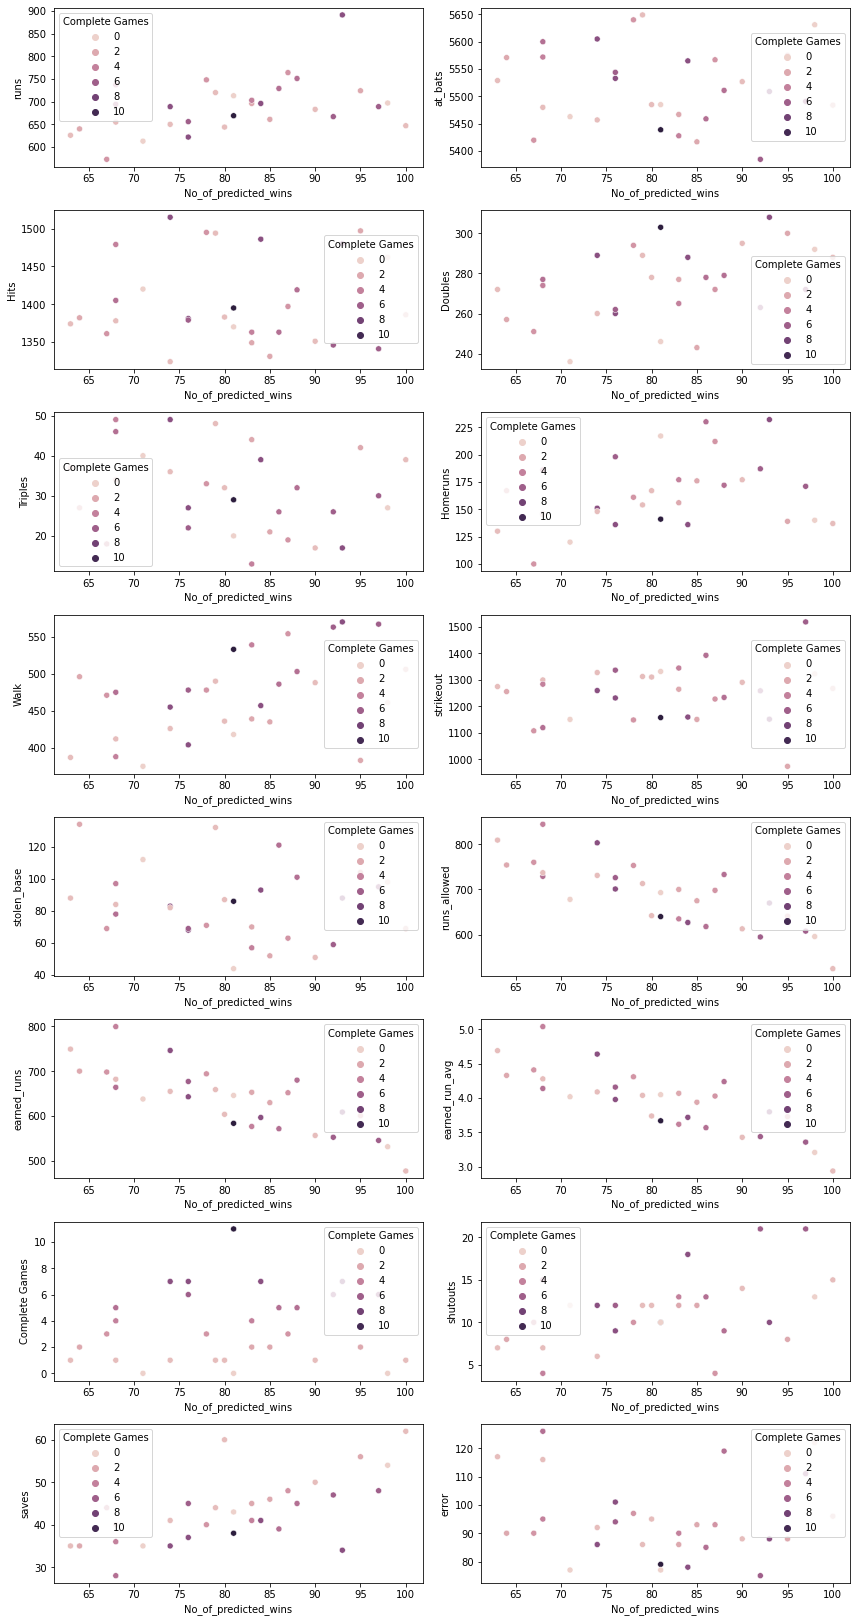

In [124]:
#checking relationship of "No_of_predicted_wins" with all the feature columns using scatterplot
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)
  sns.scatterplot(x=df.No_of_predicted_wins,y=df[col[i]],hue=df['Complete Games'])
  plt.tight_layout()

Observation: The above scatterplots shows that only homeruns,runs, and saves have a lineer relationship with our target column "No_of_predicted_wins"

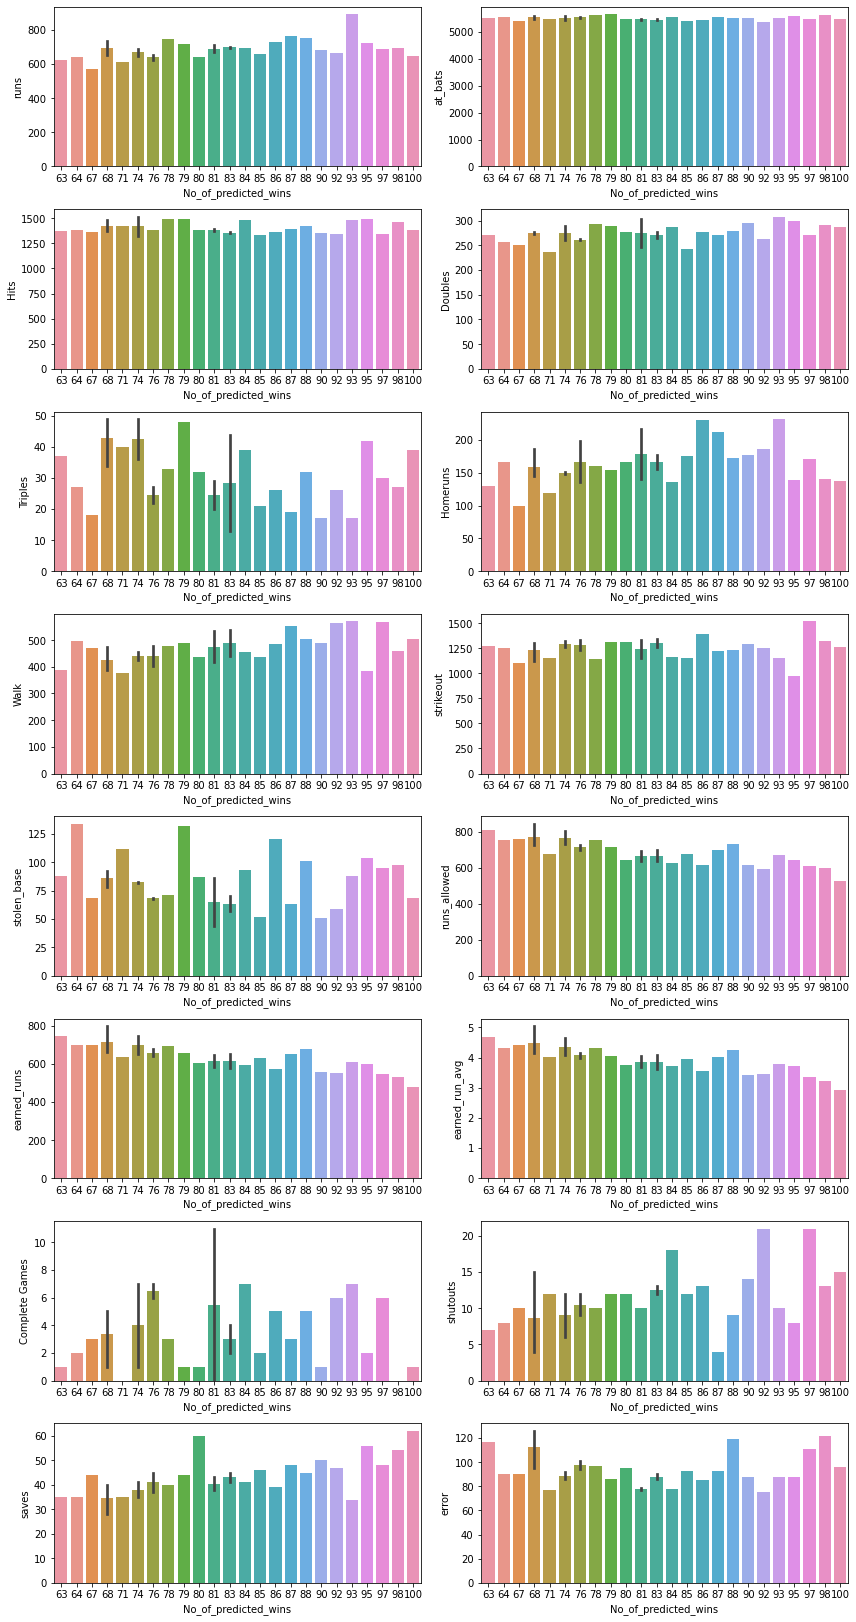

In [125]:
##checking relationship of "No_of_predicted_wins" with all the feature columns using barplot 
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)
  sns.barplot(x=df.No_of_predicted_wins,y=df[col[i]])
  plt.tight_layout()

Observations:

-Feature "runs" and it's unique values are distributed unevenly when it comes to relating with our label "No_of_predicted_wins".

-Feature "at_bats" and it's unique values are again distributed unevenly when it comes to relating with our label.

-Feature "Hits" and it's unique values do not show any linear pattern when it comes to relating with our label.

-Feature "Doubles" and it's unique values again do not form any definite pattern when it comes to relating with our label.

-Feature "Triples" and it's unique values are distributed unevenly when it comes to relating with our label.

-Feature "Homeruns" and it's unique values have no visible pattern when it comes to relating with our label.

-Feature "Walk" and it's unique values are also distributed unevenly when it comes to relating with our label.

-Feature "Strikeout" and it's unique values are unevenly patterned when it comes to relating with our label.

-Feature "stolen_base" and it's unique values are also distributed unevenly when it comes to relating with our label.

-Feature "runs_allowed" and it's unique values show a decreasing pattern when it comes to relating with our label.

-Feature "earned_runs" and it's unique values also show a decreasing pattern when it comes to relating with our label 

-Feature "earned_run_avg" and it's unique values are distributed in a slight decreasing order when it comes to relating with 
our label 

-Feature "Complete Games" and it's unique values do not show any pattern when it comes to relating with our label

-Feature "Shutouts" and it's unique values are also distributed unevenly when it comes to relating with our label

-Feature "saves" and it's unique values show a slightly increasig pattern when it comes to relating with our label

-Feature "error" and it's unique values are again distributed unevenly when it comes to relating with our label

-From the above plots we observe that as the no.of saves increasing, the winning chance is also increasing which means that it 
has a +ve correlation with our target column.

-It can also be seen that as the earned_run_avg is increasing, the No_of_predicted_wins in decreasing that means it has a negative correlation with our target column.

Text(0.5, 1.0, 'Top_10 No. of predicted wins')

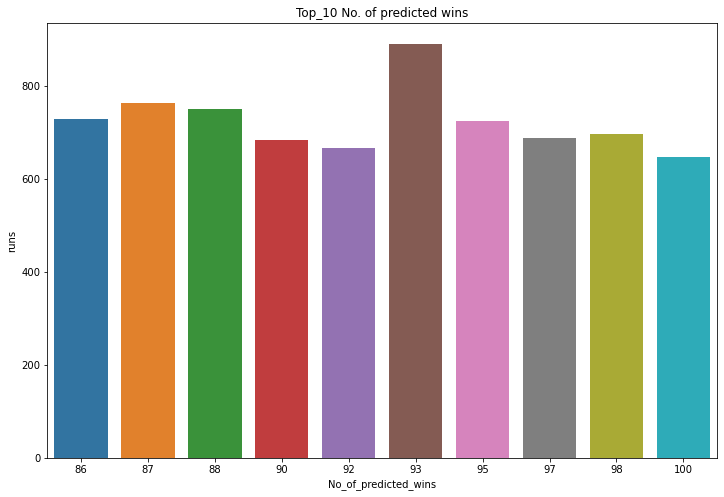

In [126]:
#checking Top 10 No_of_predicted_wins vs runs
df1=df.groupby('No_of_predicted_wins')['runs'].max()
df1=df1.reset_index()
df1=df1.sort_values(by=('No_of_predicted_wins'),ascending=True)

#plotting barplot
plt.figure(figsize=(12,8))
sns.barplot(y='runs',x='No_of_predicted_wins',data=df1.tail(10))
plt.title("Top_10 No. of predicted wins")

Remarks: It shows that there is a possibility that if runs increases, the no. of predicted wins also increases i.e., chance of winning increases.

Text(0.5, 1.0, 'Bottom_10 No. of predicted wins')

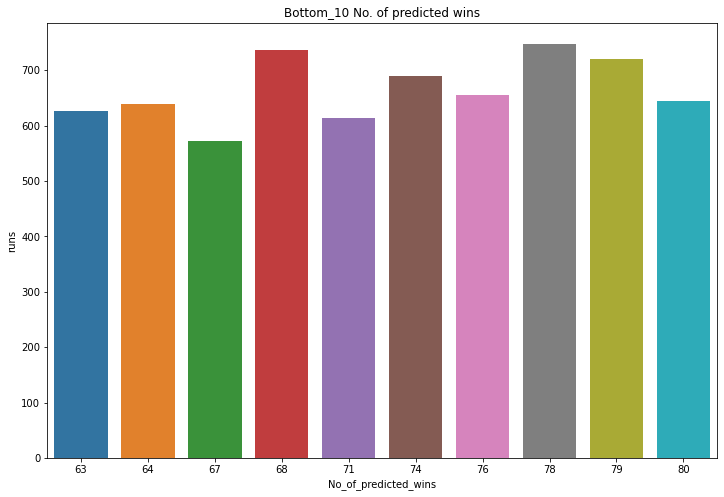

In [127]:
#Checking Bottom 10 No_of_predicted_wins vs runs with barplot
plt.figure(figsize=(12,8))
sns.barplot(y='runs',x='No_of_predicted_wins',data=df1.head(10))
plt.title("Bottom_10 No. of predicted wins")

Remarks: It shows that as the no. of runs is less, the no.of predicted wins is also less.

<AxesSubplot:xlabel='No_of_predicted_wins', ylabel='Hits'>

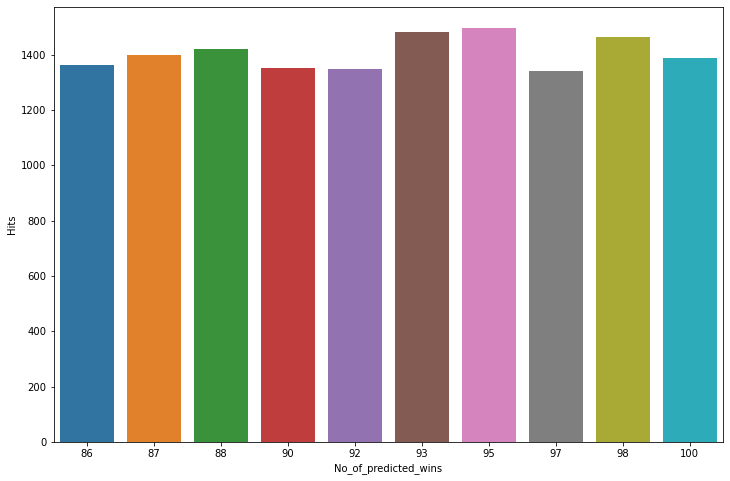

In [128]:
#Checking Top Hits when No.of predicted wins is high
df2=df.groupby('No_of_predicted_wins')['Hits'].max()
df2=df2.reset_index()
df2=df2.sort_values(by=('No_of_predicted_wins'),ascending=False)

#plotting barplot
plt.figure(figsize=(12,8))
sns.barplot(x='No_of_predicted_wins',y='Hits',data=df2.head(10))

<AxesSubplot:xlabel='No_of_predicted_wins', ylabel='Hits'>

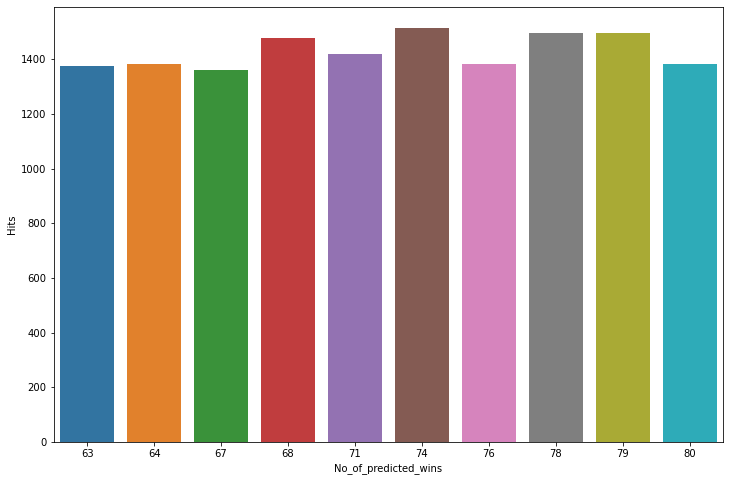

In [129]:
#Checking Top Hits when no.of predicted wins is less
plt.figure(figsize=(12,8))
sns.barplot(x='No_of_predicted_wins',y='Hits',data=df2.tail(10))

In [130]:
df.columns

Index(['No_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shutouts', 'saves',
       'error'],
      dtype='object')

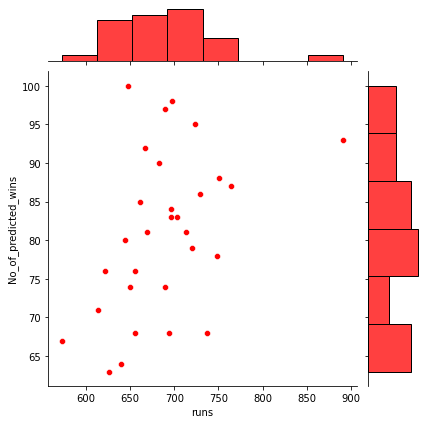

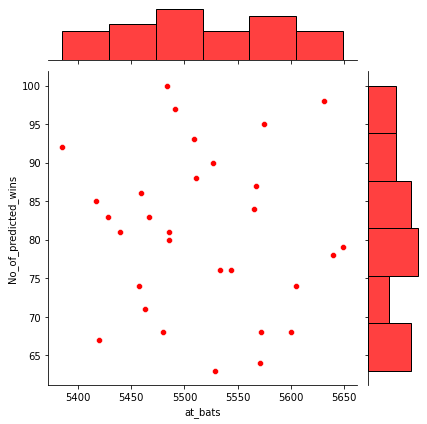

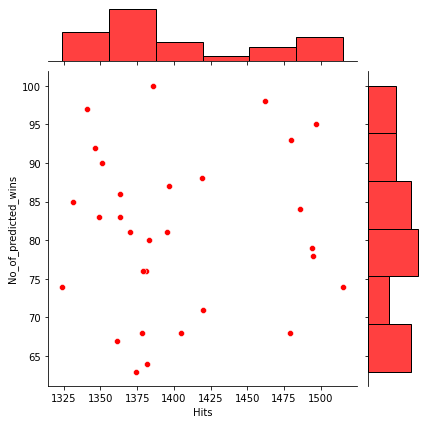

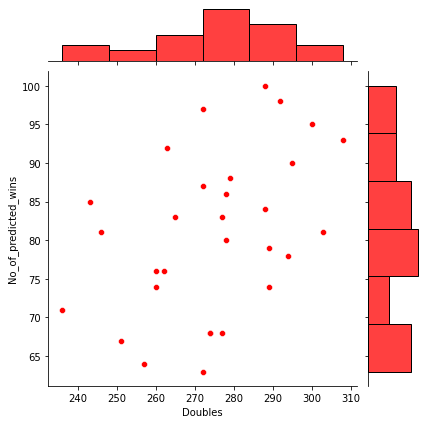

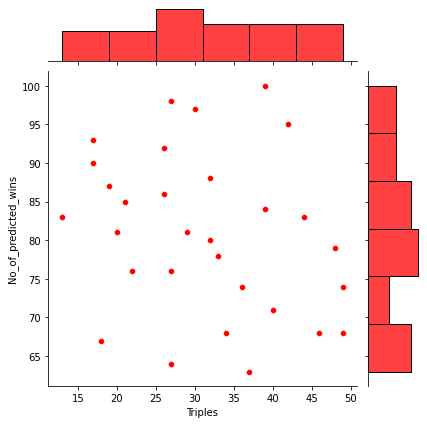

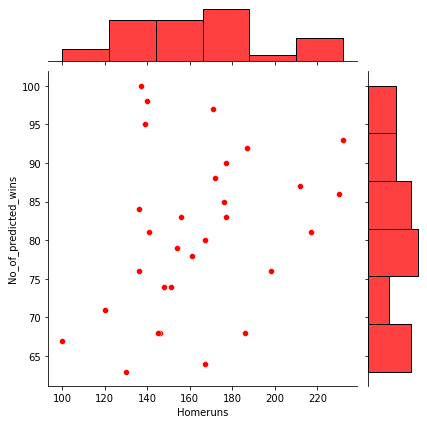

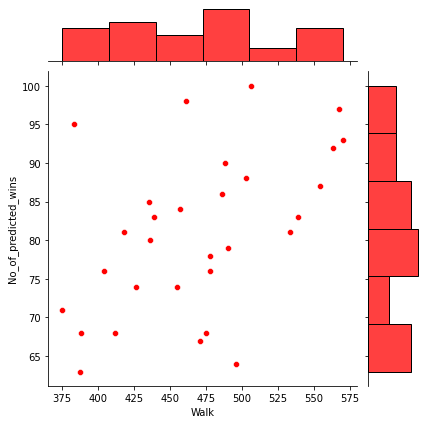

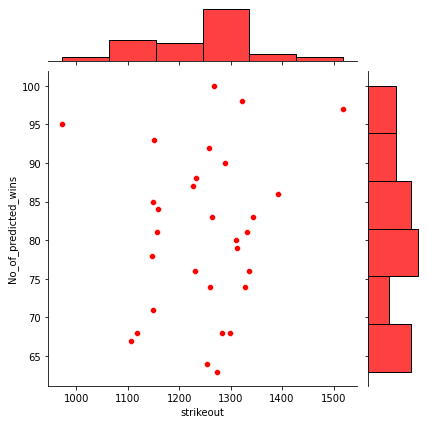

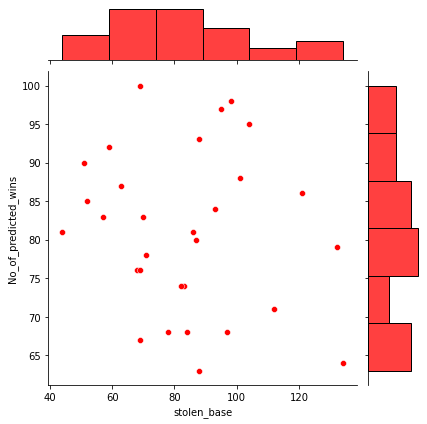

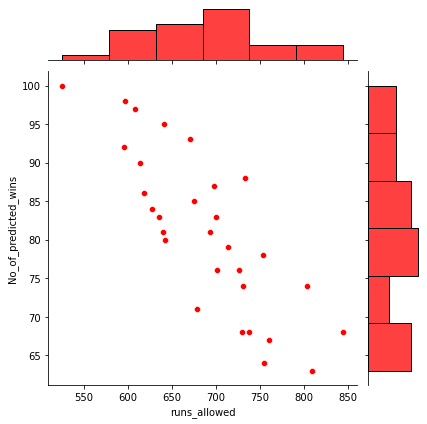

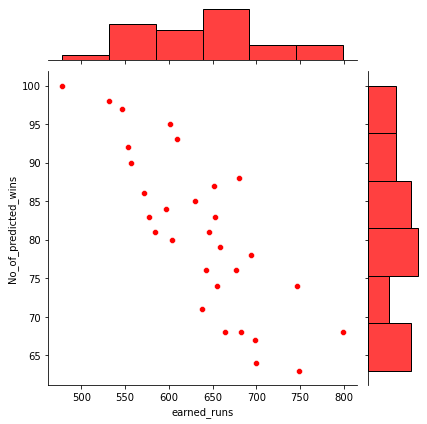

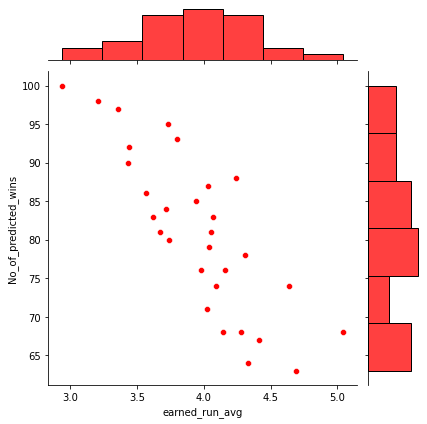

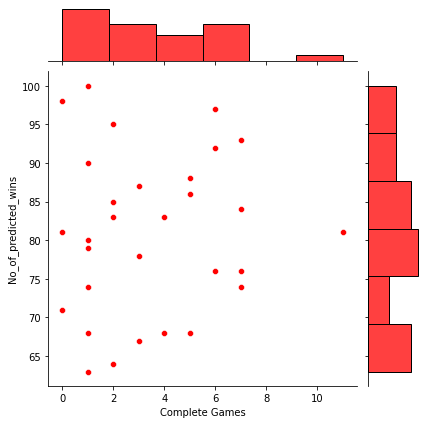

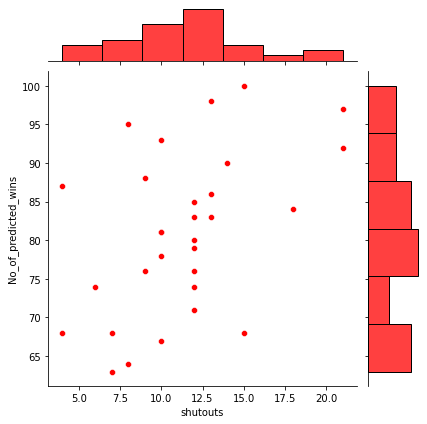

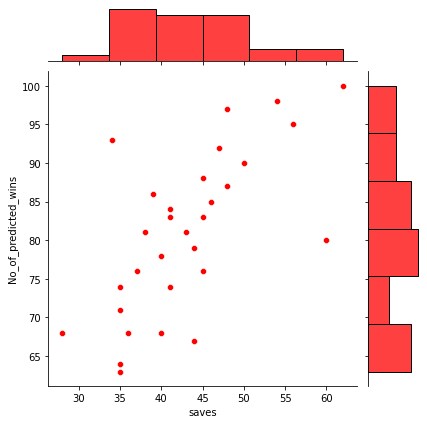

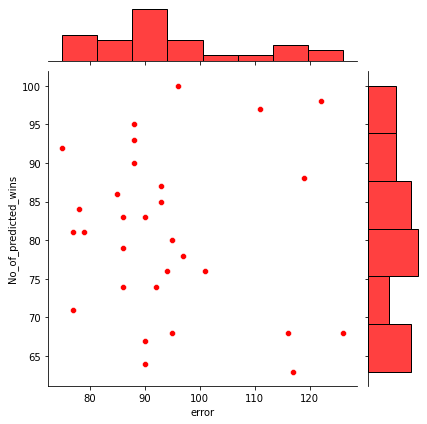

In [131]:
#checking jointplot of No_of_predicted_wins w.r.t the feature columns
sns.jointplot(x="runs", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="at_bats", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="Hits", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="Doubles", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="Triples", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="Homeruns", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="Walk", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="strikeout", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="stolen_base", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="runs_allowed", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="earned_runs", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="earned_run_avg", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="Complete Games", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="shutouts", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="saves", y="No_of_predicted_wins", data=df, color="red")
sns.jointplot(x="error", y="No_of_predicted_wins", data=df, color="red")

Observations:
    
    Plot-1-shows that as runs are getting higher,the chances of winning becomes higher
    Plot-2-shows that there is no significant relationship displayed between the label No_of_predicted_wins and the feature at_bats and the data points are all over the place.
    Plot-3- Even here we can't say if there is any linear relation with our target variable and the data points are scattered too.
    plot-4-We see that if number of doubles are under 250 the chances of win is below 85 and if the number of doubles more than 280 then the chance of win is more than 85.
    Plot-5-For some reason the data points are scattered showing no relation with the label much and therefore we can say number of triples feature is not much correlated with label.
    Plot-6-By looking at this plot we can say if the number of homeruns is below 140, the chances of wins becoms less
    Plot-7-In case the walk is above 525 then number of wins are more than 80,but still there is not much relation observed between this feature and the label variables.
    Plot-8-In this feature plot,it is not showing any linear relation with our label variable.
    Plot-9-A stolen base happens when a base runner proceeds by capturing a base to which they are not entitled to and here if stolen base is between 40 to 60 the number of wins are above 80.
    Plot-10-By observing the above plot we can say that Runs Average are negatively related to number of wins, that is because as the Runs Average number increases the win possibility decrease.
    Plot-11-Just like the Runs Average number, Earned Runs also negatively impacts to number of wins
    Plot-12-Earned Runs Average is negatively related to number of wins and is completely depends on feature Earned Runs.
    Plot-13-We can see that as number of complete games goes above 6 then the number of wins is more than 75 and there is an outlying data present too
    Plot-14-A shutout refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run so here as the shout outs rise the wins number increases too.
    Plot-15-A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances so here as the number of save goes higher the number of wins also increases.
    Plot-16-In baseball statistics an error is an act in the judgment of the official scorer of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. So here the number of errors are more in the range of 70 to 100 impacting the No. of predicted wins.


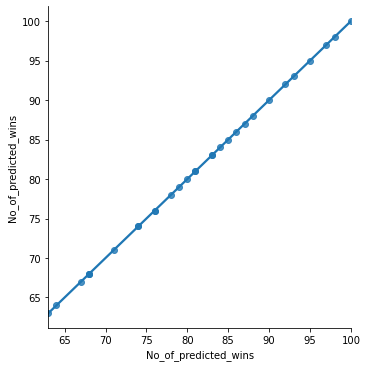

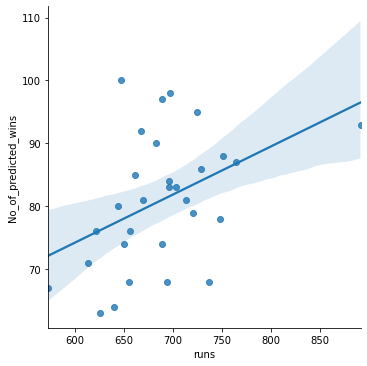

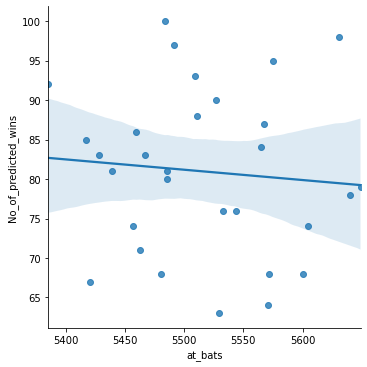

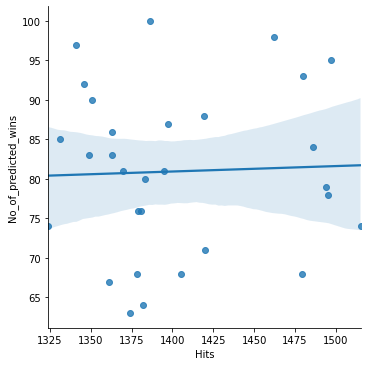

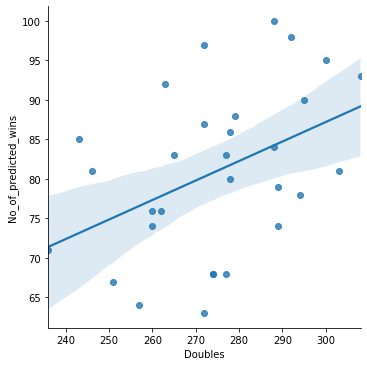

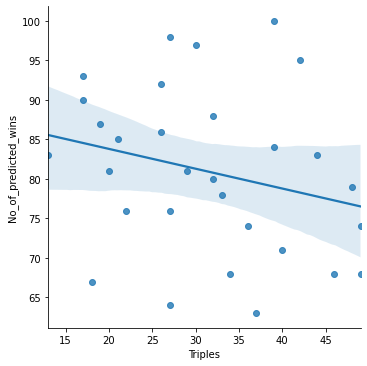

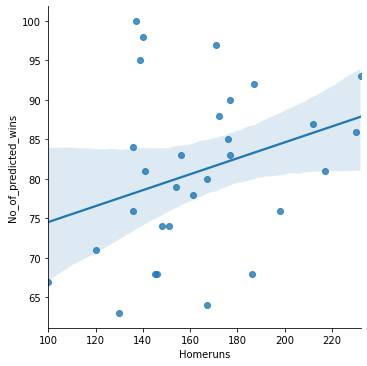

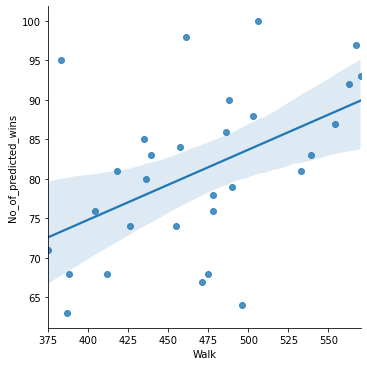

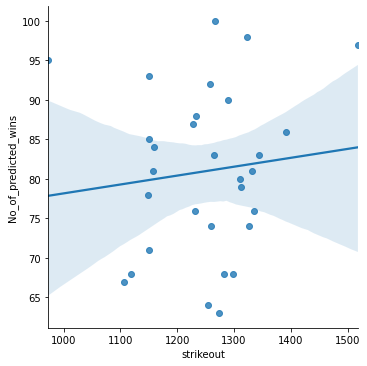

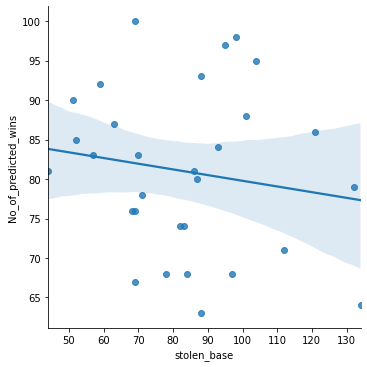

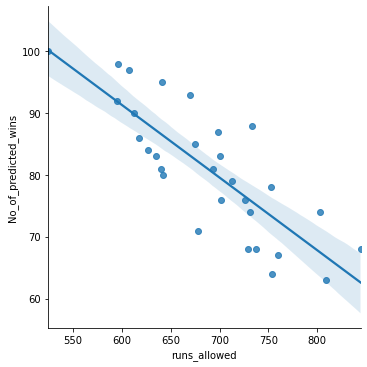

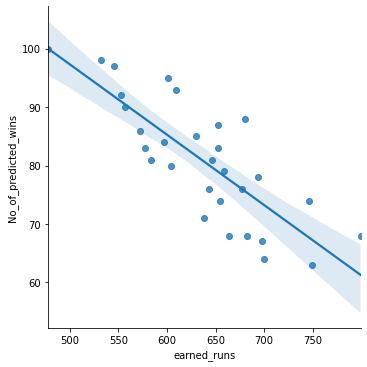

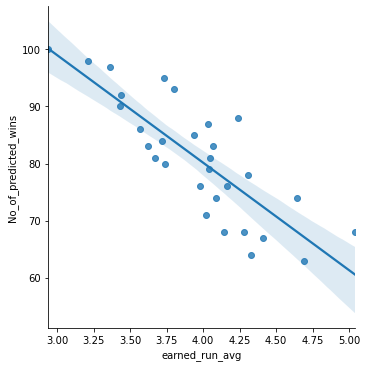

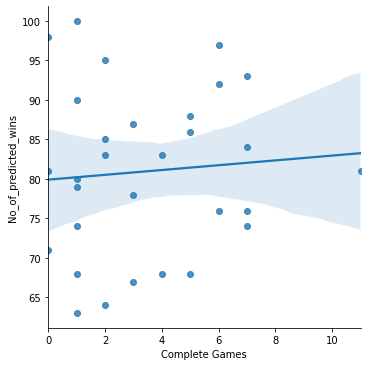

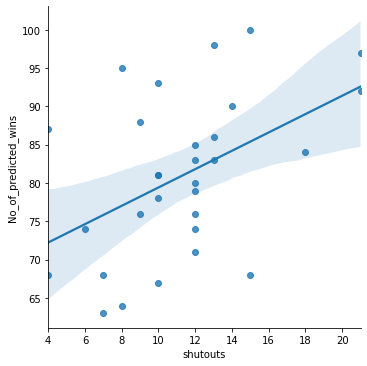

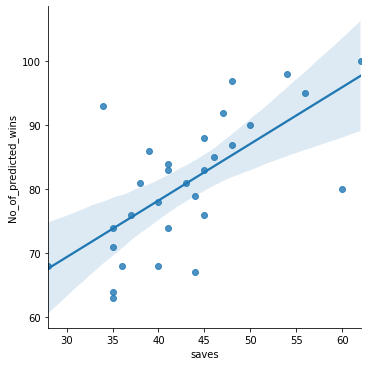

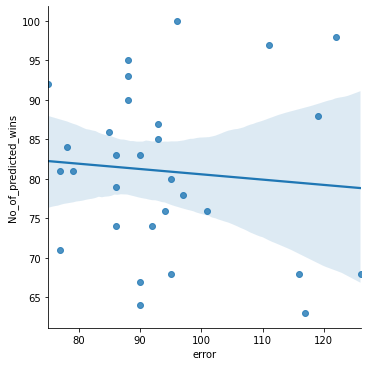

In [132]:
#Checking lmplot of target variable w.r.t. all the feature colum
for i in df:
    sns.lmplot(x = i , y ='No_of_predicted_wins' , data = df)

Remarks: From above plots, we can see that runs is directly proportional to No. of predicted wins; at_bats is inversely proportional to target variable; Hits is not much impacted by No. of predicted wins; Doubles is proportional to No. of predicted wins; Triples is again proportional to No. of predicted wins; Home runs is proportional to No. of predicted wins, Walks is also proportional to No. of predicted wins; Strike out is proportional to No. of predicted wins; Stolen bases is proportional to No. of predicted wins; runs_allowed is inversely proportional to No. of predicted wins; earned_runs is again inversely proportional to No. of predicted wins; earned_runs_average is also inversely proportional to No. of predicted wins; No. of predicted wins is somewhat affected by the number of Complete Games; No. of predicted wins is slightly affected by shutouts; and No. of predicted wins is directly proportional to Saves.

<AxesSubplot:xlabel='No_of_predicted_wins', ylabel='earned_runs'>

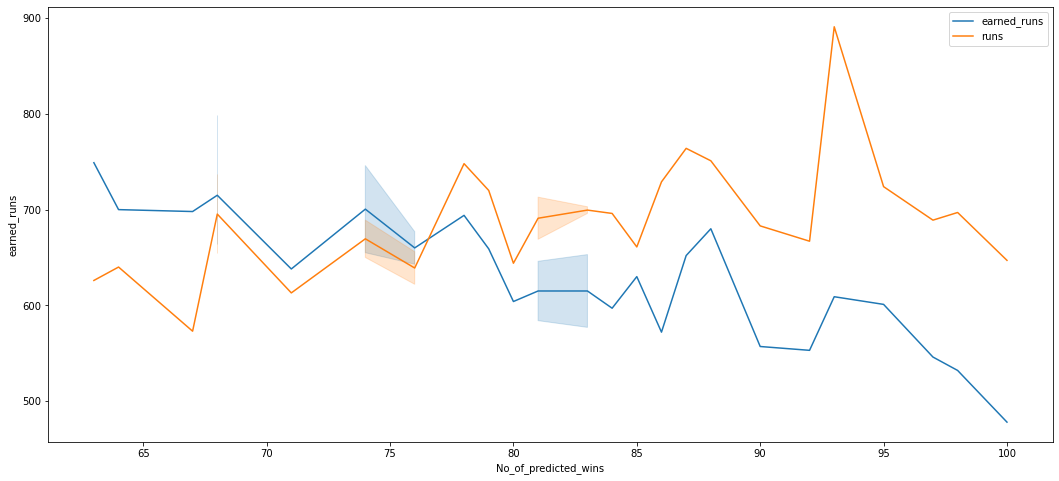

In [133]:
#Checking Frequency of earned runs and runs as per No. of predicted wins
df3=df.set_index('No_of_predicted_wins')
plt.figure(figsize=(18,8))
sns.lineplot(data=df3['earned_runs'],label='earned_runs')
sns.lineplot(data=df3['runs'],label='runs')

Observation: This plot shows that runs are increasing as the No.of predicted wins is increasing but earned runs are descreasing as the No. of predicted wins increasing.

<AxesSubplot:xlabel='No_of_predicted_wins', ylabel='Hits'>

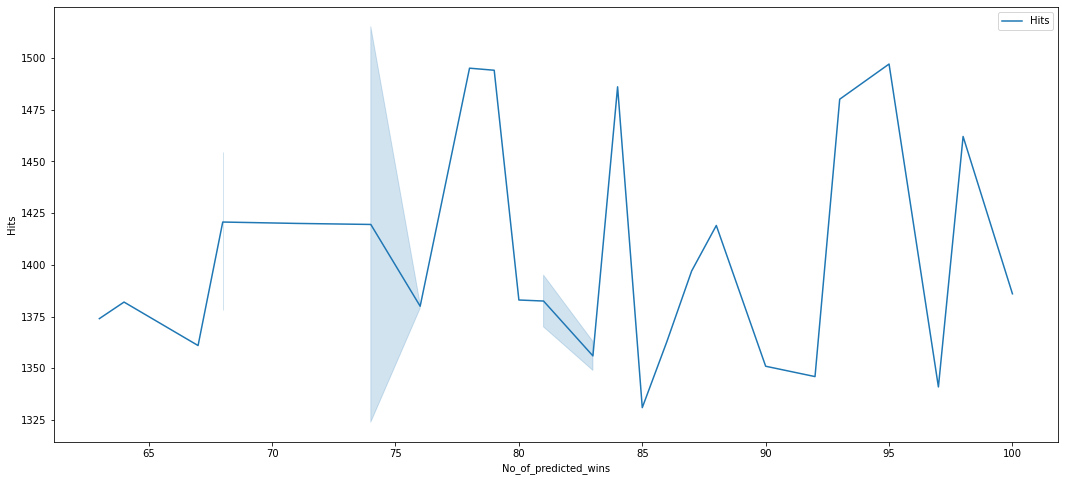

In [134]:
#Checking Frequency of Hits as per No. of predicted wins
plt.figure(figsize=(18,8))
sns.lineplot(data=df3['Hits'],label='Hits')

Observation: This shows that Hits is increasing as the No. of predicted wins increasing.

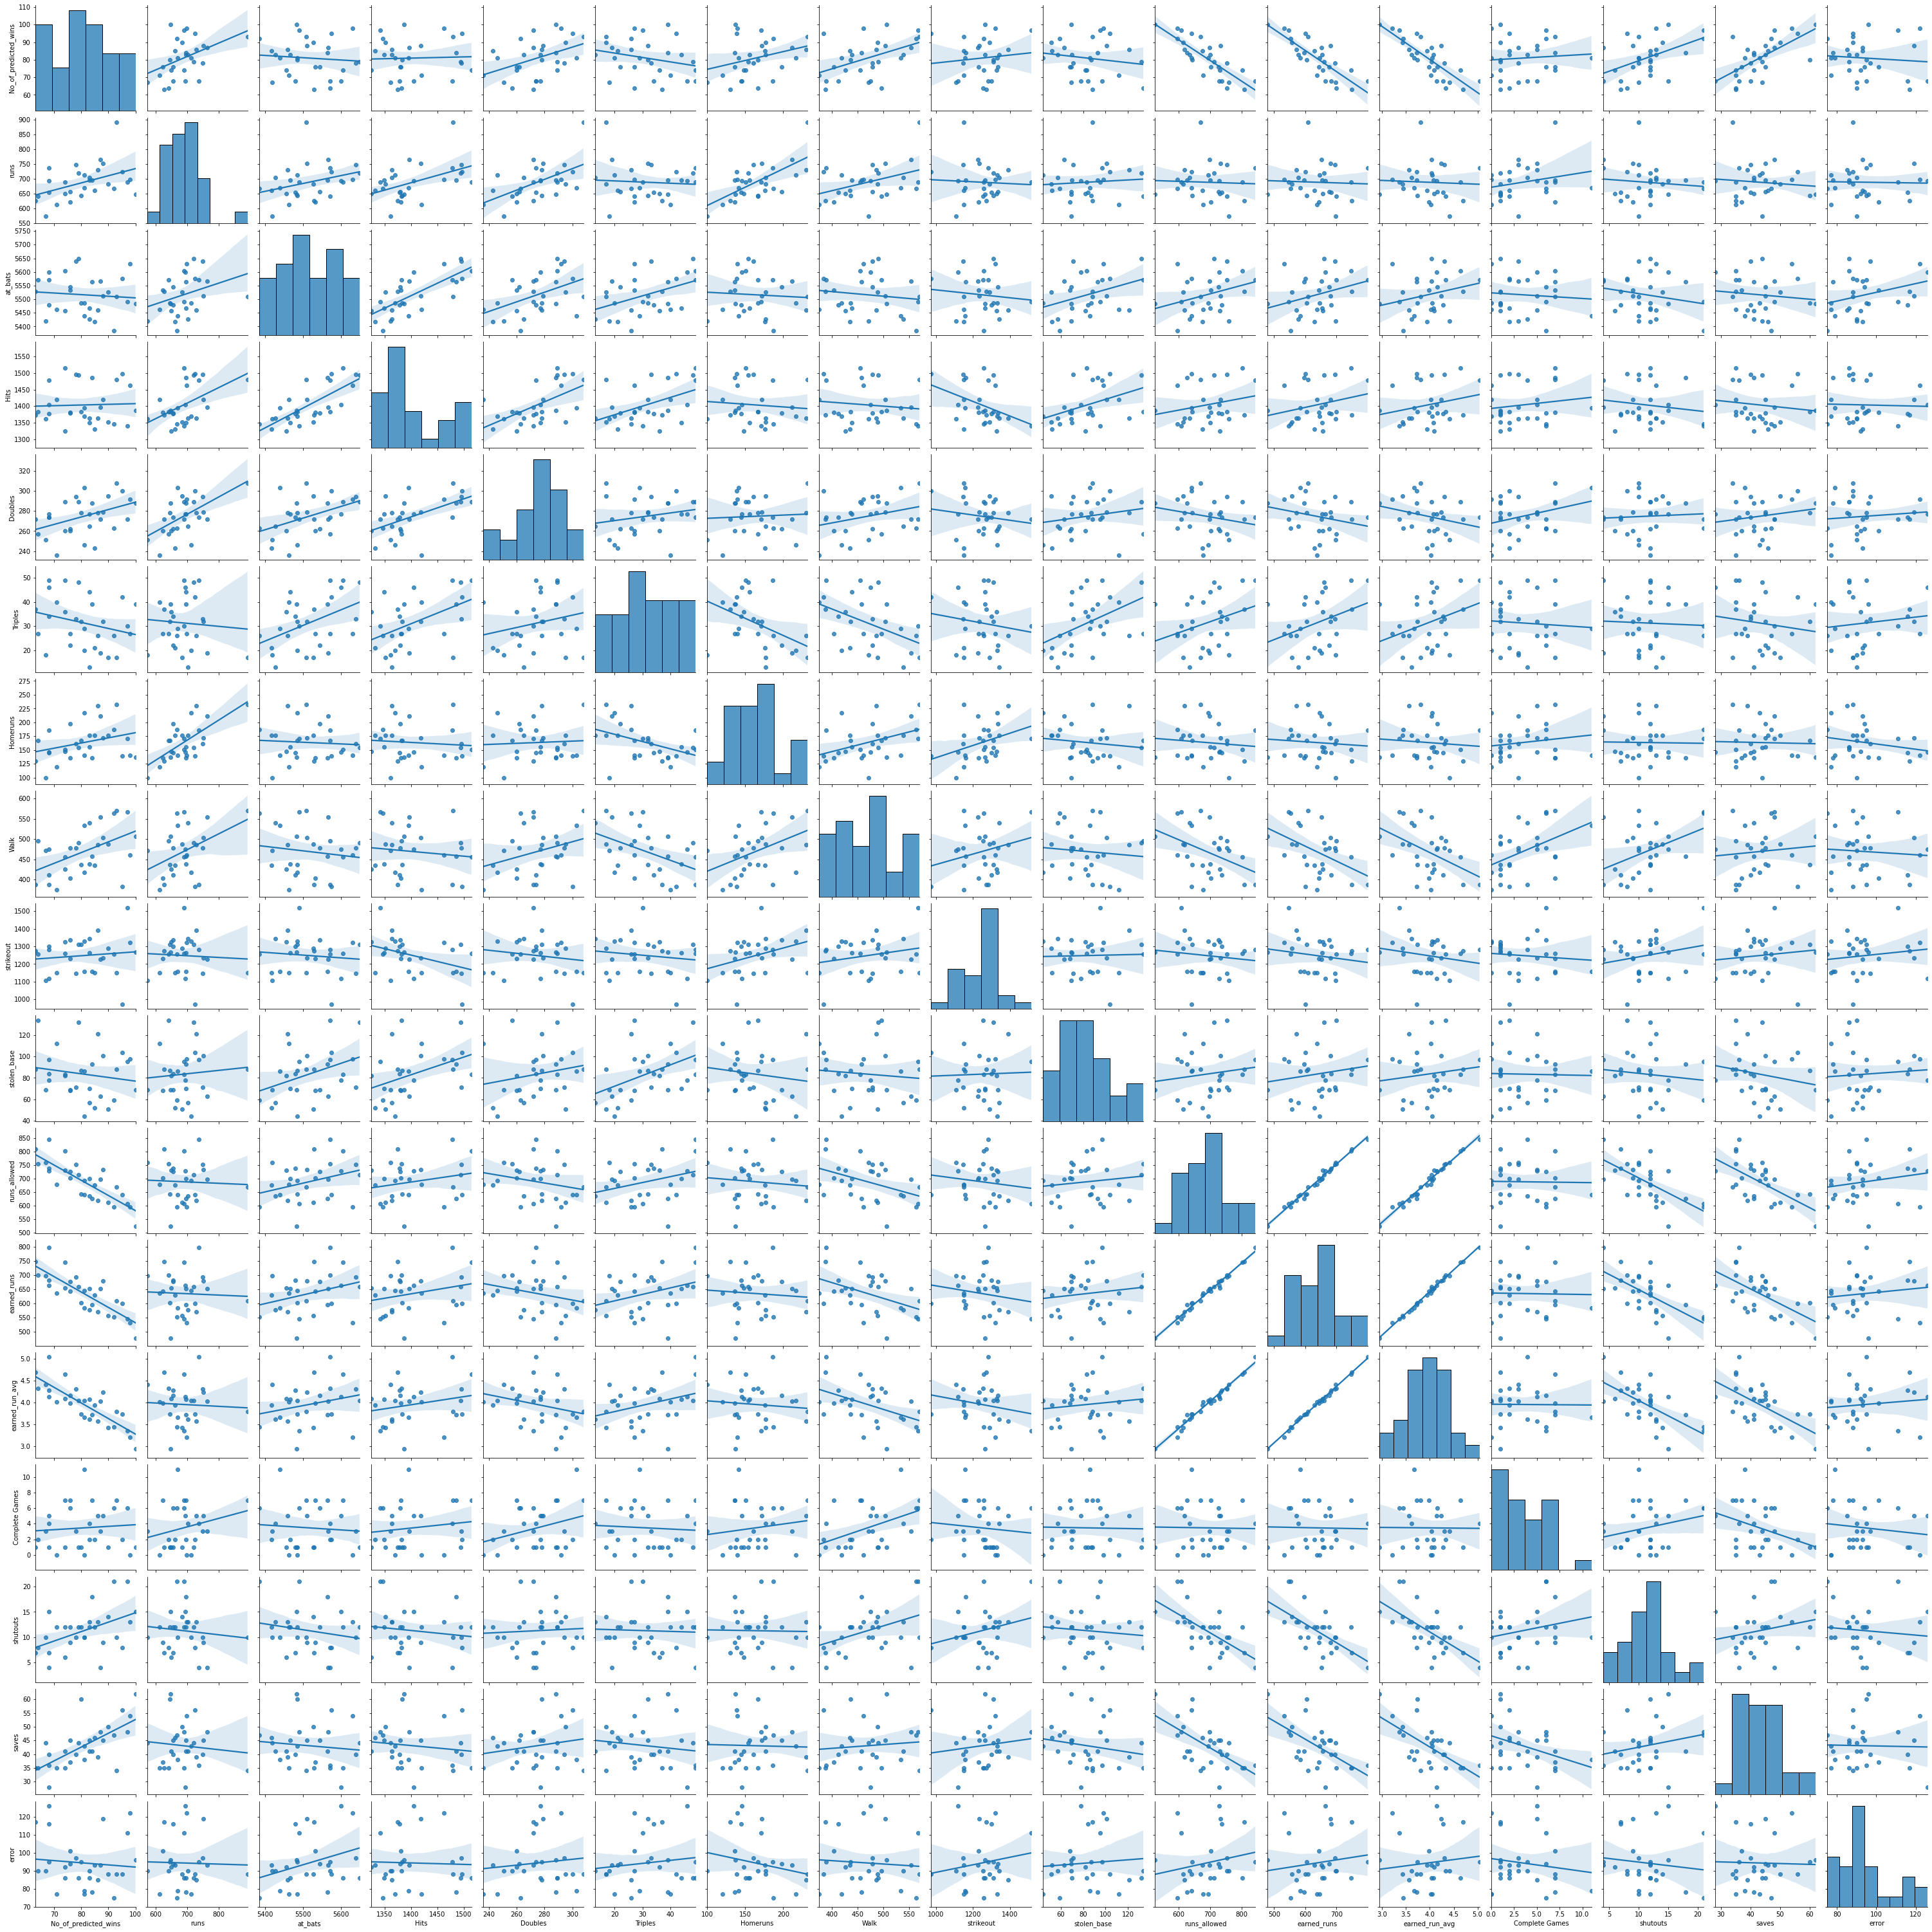

In [135]:
#Checking the relationship of target column with feature columns
sns.pairplot(df, kind='reg')

Remarks: By observing the pairplots we can easily understand the linear relationship of features with target column.

# Preparing data for model building:

In [136]:
X=df.drop(['No_of_predicted_wins'],axis=1)
y=df['No_of_predicted_wins']
print(X.shape)
print(y.shape)

(30, 16)
(30,)


In [137]:
#Doing linear regression test
pg.linear_regression(X,y)

names        coef          se         T      pval        r2  \
0        Intercept  155.023133  154.836238  1.001207  0.334999  0.949726   
1             runs    0.136594    0.037552  3.637429  0.003009  0.949726   
2          at_bats   -0.019794    0.033658 -0.588100  0.566542  0.949726   
3             Hits   -0.000334    0.036103 -0.009250  0.992760  0.949726   
4          Doubles   -0.120384    0.072022 -1.671486  0.118509  0.949726   
5          Triples    0.023095    0.112880  0.204594  0.841058  0.949726   
6         Homeruns   -0.069393    0.064855 -1.069977  0.304094  0.949726   
7             Walk   -0.027957    0.022229 -1.257704  0.230622  0.949726   
8        strikeout    0.002115    0.010204  0.207303  0.838986  0.949726   
9      stolen_base   -0.014736    0.041316 -0.356663  0.727067  0.949726   
10    runs_allowed    0.077201    0.124866  0.618271  0.547077  0.949726   
11     earned_runs    0.171078    0.379921  0.450299  0.659913  0.949726   
12  earned_run_avg  -50.133213   50.059093 -1.001481  0.334872  0.949726   
13  Complete Games    0.872317    0.411489  2.119904  0.053830  0.949726   
14        shutouts    0.272264    0.301611  0.902697  0.383108  0.949726   
15           saves    0.676473    0.198926  3.400621  0.004737  0.949726   
16           error   -0.019033    0.068858 -0.276403  0.786584  0.949726   

     adj_r2    CI[2.5%]   CI[97.5%]  
0   0.88785 -179.480222  489.526488  
1   0.88785    0.055467    0.217720  
2   0.88785   -0.092507    0.052919  
3   0.88785   -0.078329    0.077662  
4   0.88785   -0.275979    0.035210  
5   0.88785   -0.220768    0.266957  
6   0.88785   -0.209504    0.070717  
7   0.88785   -0.075980    0.020065  
8   0.88785   -0.019928    0.024159  
9   0.88785   -0.103995    0.074523  
10  0.88785   -0.192556    0.346958  
11  0.88785   -0.649692    0.991848  
12  0.88785 -158.279308   58.012882  
13  0.88785   -0.016651    1.761286  
14  0.88785   -0.379328    0.923855  
15  0.88785    0.246719    1.106228  
16  0.88785   -0.167792    0.129726

Observation:There are only some columns that have linear relationship with target column like 'saves' and'runs'

# Multivariate Analysis

# Checking Correlation:

<AxesSubplot:>

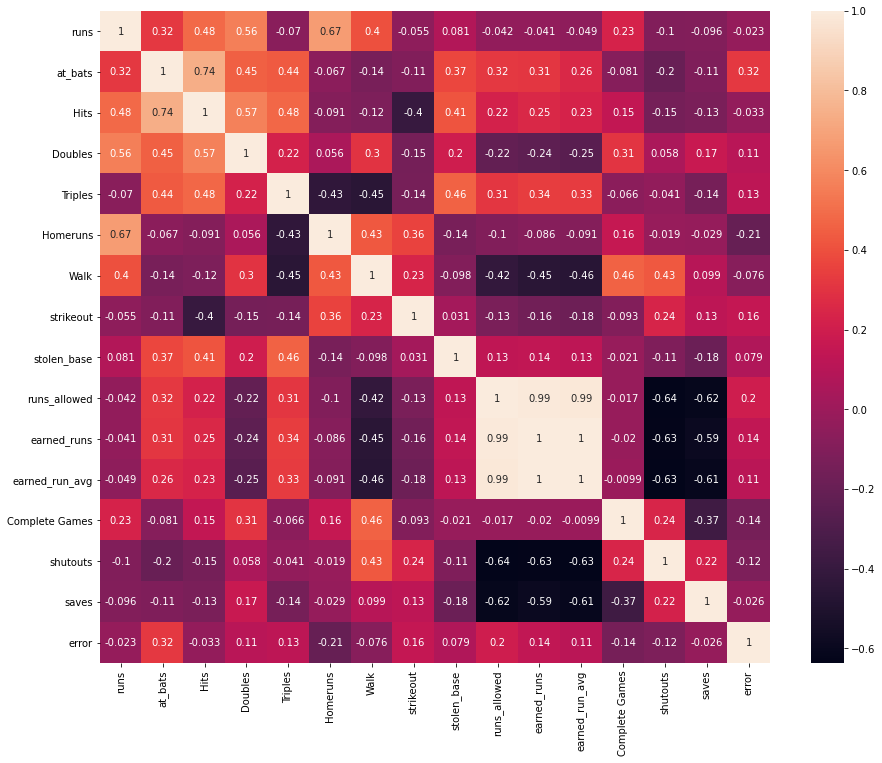

In [138]:
#Plotting heatmap to check correlation
X_corr=X.corr()
plt.figure(figsize=(15,12))
sns.heatmap(X_corr,annot=True)

Remarks: There is high correlation between the feature columns "earned_runs", "earned_run_avg" and "runs_allowed". To avoid multi-collinearity, we are going to drop "earned_runs" column.

In [139]:
#dropping a column
X=X.drop(['earned_runs'],axis=1)

# Checking outliers:

<AxesSubplot:xlabel='variable', ylabel='value'>

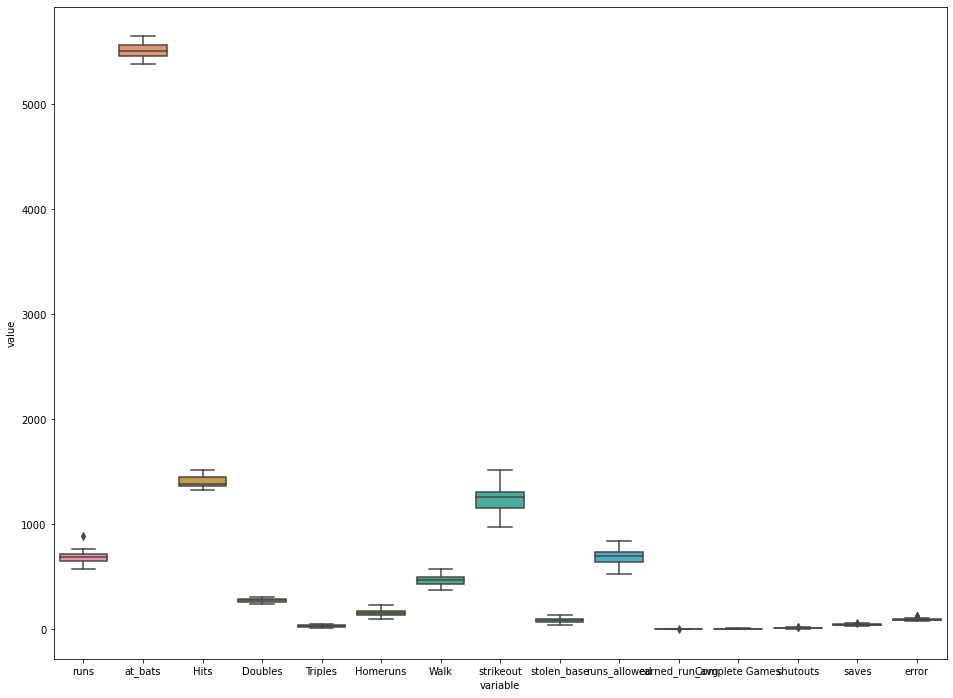

In [140]:
plt.figure(figsize=(16,12))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

# Before removing outliers:

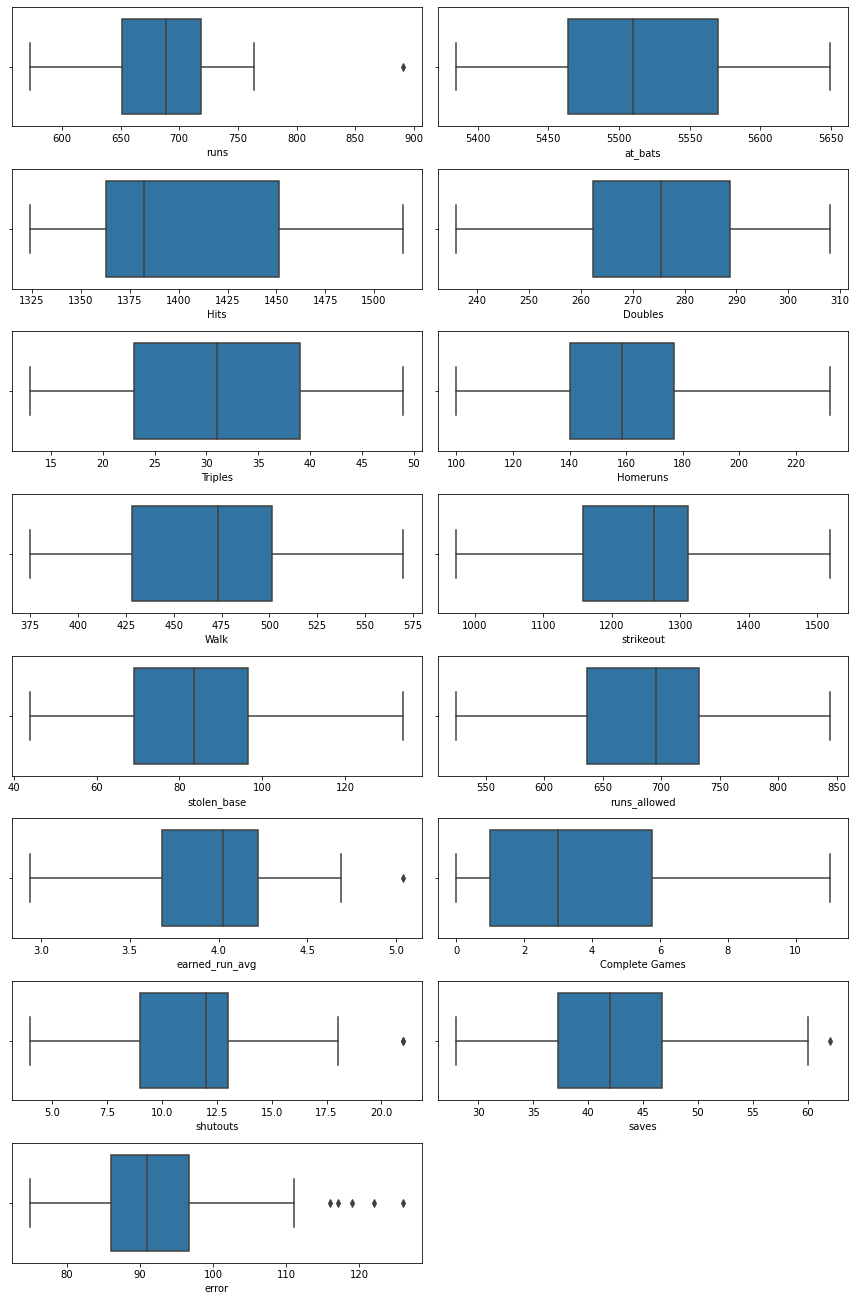

In [141]:
X_new=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_new)):
  plt.subplot(9,2,i+1)
  sns.boxplot(X[X_new[i]])
  plt.tight_layout()

Remarks: We can see that there are some outliers present that we are going to treat accodingly.

In [142]:
#removing outliers with quantile method
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]] = percentile[0]
  X[col][X[col]>=percentile[1]] = percentile[1]

# Checking Boxplot after outliers removal:

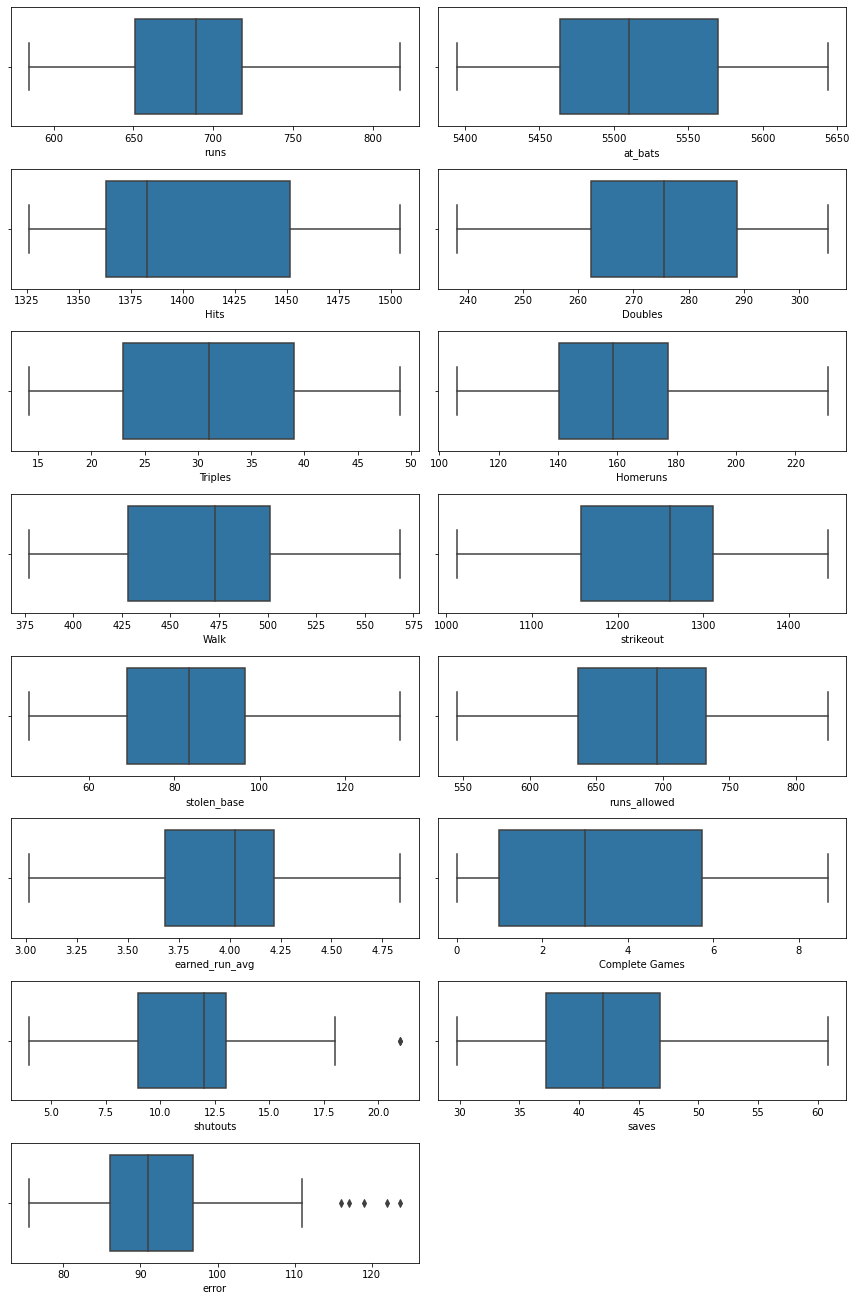

In [143]:
X_new=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_new)):
  plt.subplot(9,2,i+1)
  sns.boxplot(X[X_new[i]])
  plt.tight_layout()

Remarks: It shows that most of our outliers has been removed

# Checking skewness:

In [144]:
X.skew()

runs              0.374429
at_bats           0.204423
Hits              0.648897
Doubles          -0.239246
Triples           0.156165
Homeruns          0.582027
Walk              0.160977
strikeout        -0.361504
stolen_base       0.490160
runs_allowed      0.067041
earned_run_avg   -0.074063
Complete Games    0.390283
shutouts          0.565790
saves             0.693599
error             0.860787
dtype: float64

In [145]:
x=X

In [146]:
#removing skewness
X1=power_transform(X,method='yeo-johnson')
X1=pd.DataFrame(X1,columns=x.columns)

In [147]:
#checking for skewness after its removal
X1.skew()

runs              0.000000
at_bats           0.000000
Hits              0.000000
Doubles          -0.043478
Triples          -0.067252
Homeruns          0.000000
Walk             -0.006992
strikeout        -0.016053
stolen_base      -0.008943
runs_allowed     -0.013854
earned_run_avg   -0.013748
Complete Games   -0.094750
shutouts          0.006560
saves             0.015250
error             0.067016
dtype: float64

In [148]:
#Scaling training data using StandardScaler
scaler=StandardScaler()
X2=scaler.fit_transform(X1)
X2=pd.DataFrame(X2,columns=x.columns)

# Spliting data for model using train test split

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=42)

# Finding the best model:

In [150]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KernelRidge":KernelRidge(),
    "MLPRegressor":MLPRegressor()
}

*************************************************** LinearRegression ************************************************************


R2_SCORE 0.689156665653714


SCORE 0.689156665653714


MEAN_SQUARED_ERROR 41.86023569196651


MEAN_ABSOLUTE_ERROR 5.004551572114142


RMSE 6.469948662235776


MODEL LEARNING CURVE


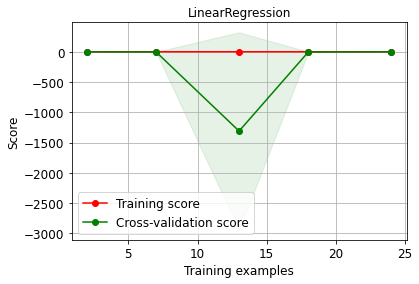

*************************************************** DecisionTreeRegressor ************************************************************


R2_SCORE 0.429042904290429


SCORE 0.429042904290429


MEAN_SQUARED_ERROR 76.88888888888889


MEAN_ABSOLUTE_ERROR 7.555555555555555


RMSE 8.768630958643937


MODEL LEARNING CURVE


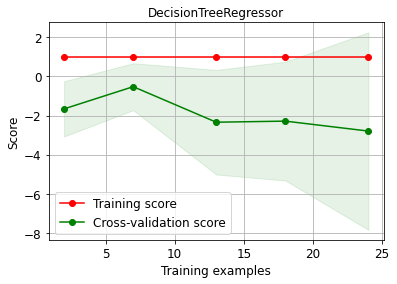

*************************************************** ExtraTreesRegressor ************************************************************


R2_SCORE 0.6929776402640264


SCORE 0.6929776402640264


MEAN_SQUARED_ERROR 41.34567777777779


MEAN_ABSOLUTE_ERROR 5.027777777777778


RMSE 6.4300604801026395


MODEL LEARNING CURVE


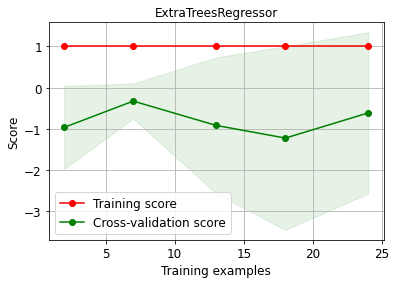

*************************************************** RandomForestRegressor ************************************************************


R2_SCORE 0.6663279702970297


SCORE 0.6663279702970297


MEAN_SQUARED_ERROR 44.9345


MEAN_ABSOLUTE_ERROR 5.452222222222223


RMSE 6.70332007291909


MODEL LEARNING CURVE


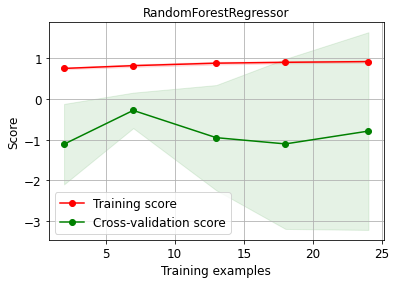

*************************************************** KernelRidge ************************************************************


R2_SCORE -79.31794837489318


SCORE -79.31794837489318


MEAN_SQUARED_ERROR 10816.150381152282


MEAN_ABSOLUTE_ERROR 101.94754988057736


RMSE 104.00072298379604


MODEL LEARNING CURVE


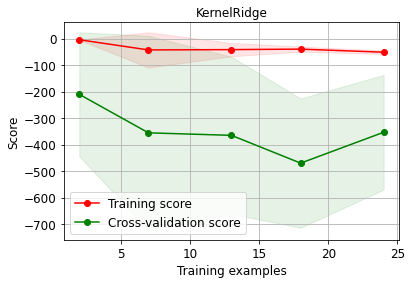

*************************************************** MLPRegressor ************************************************************


R2_SCORE -32.41191794664759


SCORE -32.41191794664759


MEAN_SQUARED_ERROR 4499.471616815209


MEAN_ABSOLUTE_ERROR 66.35580206603994


RMSE 67.07810087364734


MODEL LEARNING CURVE


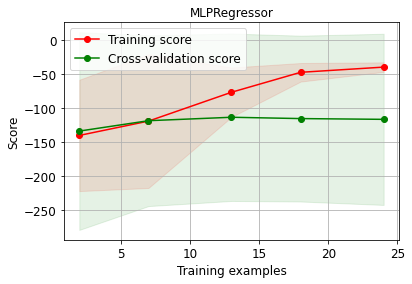

In [151]:
RMSE=[]
MSE=[]
MAE=[]
CVS=[]
R2=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print("R2_SCORE",r2)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("\n")
  print("MEAN_SQUARED_ERROR",mse)
  print('\n')
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('MEAN_ABSOLUTE_ERROR',mae)
  print('\n')
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print("RMSE",rmse)
  print('\n')
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X2,y,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

Remarks: cross validation is not possible in this case because our dataset is too small.

# Remarks:We are proceeding with ExtraTreeRegressor because it is giving a good accuracy and metrics.

R2_SCORE 0.6929776402640264


SCORE 0.6929776402640264


MEAN_SQUARED_ERROR 41.34567777777779


MEAN_ABSOLUTE_ERROR 5.027777777777778


RMSE 6.4300604801026395


# Hyper parameter tuning on the best ML Model:

In [153]:
etree=ExtraTreesRegressor()
etree.fit(X_train,y_train)

ExtraTreesRegressor()

In [154]:
etree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [155]:
param={
 'bootstrap': [False,True],
 'max_depth': [None,1,2,3,4],
 'max_leaf_nodes': [None,1,2,3,4],
 'max_samples': [None,1,2,3],
 'min_impurity_split': [None,1,2,3,4],
 'min_samples_leaf': [1,None,2,3],
 'min_samples_split': [2,1,3,4]
}

In [156]:
grid=GridSearchCV(estimator=etree,param_grid=param,cv=2,n_jobs=-1)

Remarks: We are using the Grid Search CV method for hyper parameter tuning the best model.

In [157]:
grid.fit(X2,y)

GridSearchCV(cv=2, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_leaf_nodes': [None, 1, 2, 3, 4],
                         'max_samples': [None, 1, 2, 3],
                         'min_impurity_split': [None, 1, 2, 3, 4],
                         'min_samples_leaf': [1, None, 2, 3],
                         'min_samples_split': [2, 1, 3, 4]})

Remarks: we have trained the Grid Search CV with the list of parameters that we feel it should check for best possible outcomes

In [158]:
grid.best_score_

0.14923498807488528

In [159]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 1,
 'max_leaf_nodes': 3,
 'max_samples': 3,
 'min_impurity_split': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Remarks: Here the Grid Search CV has provided us with the best parameters list out of all the combinations it used to train the model

# Hyperparameter tuning:

In [160]:
ETREE=ExtraTreesRegressor(bootstrap= True,
 max_depth= 3,
 max_leaf_nodes= None,
 max_samples= 3,
 min_impurity_split=1,
 min_samples_leaf= 1,
 min_samples_split= 2)

In [161]:
ETREE.fit(X_train,y_train)
ETREE.score(X_test,y_test)

0.29399624587458684

# Final model metrics

In [162]:
y_pred=ETREE.predict(X_test)
print("mean_square_error",mean_squared_error(y_pred,y_test))
print("mean_absolute_error",mean_absolute_error(y_pred,y_test))
print("Root_mean_square_error",np.sqrt(mean_squared_error(y_pred,y_test)))
print("r2_score",r2_score(y_pred,y_test))

mean_square_error 95.0751722222223
mean_absolute_error 7.685555555555562
Root_mean_square_error 9.750649835894134
r2_score -18.761960935614592


# Final model graph:

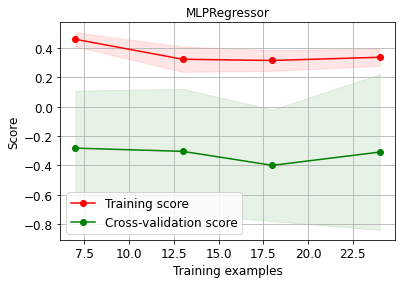

In [163]:
skplt.estimators.plot_learning_curve(ETREE,X2,y,cv=5,scoring='r2',text_fontsize='large',title=name)
plt.show()

Remarks: Hyperparameter tuning is not working because of such a small data.

# Saving the best model

In [165]:
joblib.dump(etree,"Baseball.obj")

['Baseball.obj']

# Loading the model

In [166]:
model=joblib.load('Baseball.obj')

In [167]:
model.predict(X_test)

array([80.69, 94.45, 76.19, 91.71, 92.91, 75.05, 72.23, 67.65, 83.18])

# Conclusion
1. In this dataset all the columns was having numerical value and there was no object column.

2. We did EDA (plotting various kinds of figure) to understand the data and wrote an observation as well.

3. The dataset is very small  having only 30 rows so model did not get trained well because we need good amount of data to make model and cross validation was  not possible because of small amount of data.

4. At the end, we trained a model with train test split that is giving 69.29% r2_score. We also did hyperparameter tuning but because of small dataset,it was not working properly.